<a href="https://colab.research.google.com/github/sesmael/ECGR-4105/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Non-numeric columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 24945096654848.0000 - mae: 4676139.0000 - val_loss: 30129967333376.0000 - val_mae: 5007534.0000
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25364692729856.0000 - mae: 4726217.5000 - val_loss: 30129919098880.0000 - val_mae: 5007529.5000
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25493652897792.0000 - mae: 4740400.0000 - val_loss: 30129849892864.0000 - val_mae: 5007523.0000
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24727626186752.0000 - mae: 4664979.0000 - val_loss: 30129757618176.0000 - val_mae: 5007514.5000
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26070157885440.0000 - mae: 4774206.5000 - val_loss: 30129633886208.0000 - val_mae: 5007503.5000
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25907653771264.0000 - mae: 4748079.0000 - val_loss: 30129478696960.0000 - val_mae: 5007489.0000
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2571324987

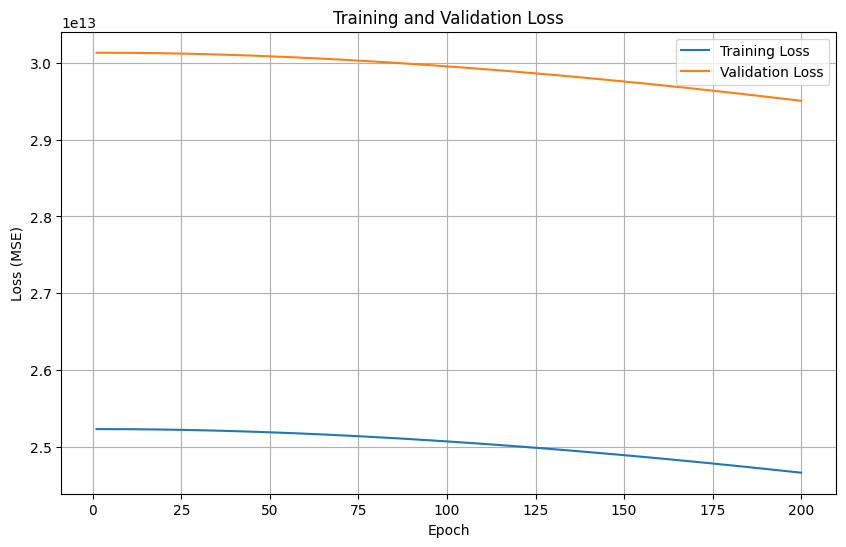

In [1]:
###################################################
############# problem 1 (a) #######################
###################################################
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time

# Load the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing_data = pd.read_csv(url)

# Check for non-numeric columns
non_numeric_cols = housing_data.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_cols.tolist()}")

# Convert binary categorical columns to numeric (yes/no to 1/0)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    if col in housing_data:
        housing_data[col] = housing_data[col].apply(lambda x: 1 if x == 'yes' else 0)

# Handle the `furnishingstatus` column using one-hot encoding
if 'furnishingstatus' in housing_data:
    housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

# Ensure no NaN values exist after processing
housing_data = housing_data.dropna()

# Separate features and target
X = housing_data.drop(columns=['price'])
y = housing_data['price']

# Check if dataset is empty
if X.empty or y.empty:
    raise ValueError("Processed dataset is empty. Check preprocessing steps or dataset integrity.")

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 8 nodes
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model and measure training time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)
training_time = time.time() - start_time

# Evaluate the model on the validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)

# Prepare results for reporting
results = {
    "Training Time (seconds)": training_time,
    "Final Training Loss (MSE)": history.history['loss'][-1],
    "Final Validation Loss (MSE)": val_loss,
    "Final Validation MAE": val_mae
}

# Convert training history to a DataFrame for analysis
training_history = pd.DataFrame({
    "Epoch": range(1, len(history.history['loss']) + 1),
    "Training Loss": history.history['loss'],
    "Validation Loss": history.history['val_loss']
})

# Display results
print("Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

# Plot training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(training_history['Epoch'], training_history['Training Loss'], label='Training Loss')
plt.plot(training_history['Epoch'], training_history['Validation Loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 24732952952832.0000 - mae: 4673562.5000 - val_loss: 30129988304896.0000 - val_mae: 5007536.0000
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 26040743231488.0000 - mae: 4774390.0000 - val_loss: 30129988304896.0000 - val_mae: 5007536.0000
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24567099686912.0000 - mae: 4682777.0000 - val_loss: 30129984110592.0000 - val_mae: 5007535.5000
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25685940764672.0000 - mae: 4746812.0000 - val_loss: 30129975721984.0000 - val_mae: 5007535.5000
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24821295480832.0000 - mae: 4671340.5000 - val_loss: 30129967333376.0000 - val_mae: 5007534.0000
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24295021477888.0000 - mae: 4586035.5000 - val_loss: 30129954750464.0000 - val_mae: 5007533.0000
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 253813231

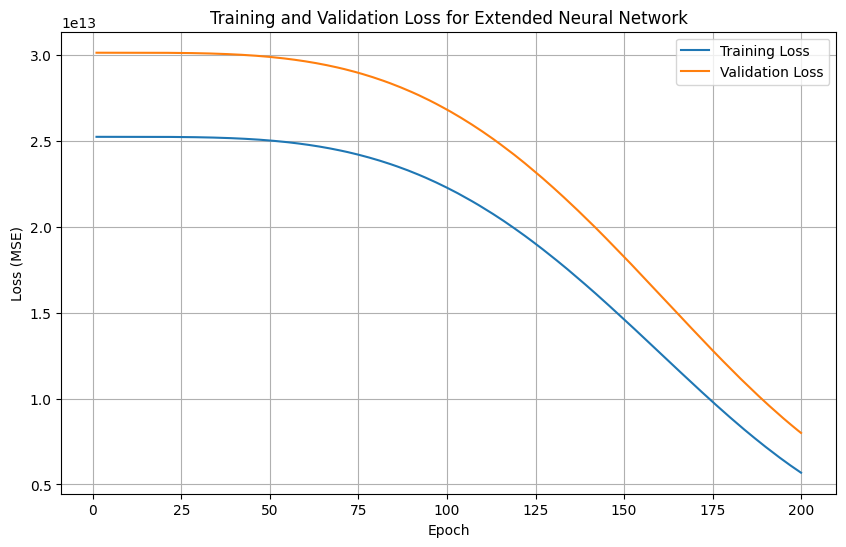

In [2]:
###################################################
############# problem 1 (b) #######################
###################################################
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

# Separate features and target
X = housing_data.drop(columns=['price'])
y = housing_data['price']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the extended neural network model with two additional hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 8 nodes
    tf.keras.layers.Dense(16, activation='relu'),  # Second hidden layer with 16 nodes
    tf.keras.layers.Dense(8, activation='relu'),  # Third hidden layer with 8 nodes
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and measure training time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)
training_time = time.time() - start_time

# Evaluate the model on the validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)

# Prepare results for reporting
results = {
    "Training Time (seconds)": training_time,
    "Final Training Loss (MSE)": history.history['loss'][-1],
    "Final Validation Loss (MSE)": val_loss,
    "Final Validation MAE": val_mae
}

# Convert training history to a DataFrame for analysis
training_history = pd.DataFrame({
    "Epoch": range(1, len(history.history['loss']) + 1),
    "Training Loss": history.history['loss'],
    "Validation Loss": history.history['val_loss']
})

# Display results
print("Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_history['Epoch'], training_history['Training Loss'], label='Training Loss')
plt.plot(training_history['Epoch'], training_history['Validation Loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss for Extended Neural Network")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100


<ipython-input-5-200744c4a7dd>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6114 - loss: 0.6962 - val_accuracy: 0.8596 - val_loss: 0.4498
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8222 - loss: 0.4561 - val_accuracy: 0.9386 - val_loss: 0.3162
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9018 - loss: 0.3222 - val_accuracy: 0.9474 - val_loss: 0.2448
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.2605 - val_accuracy: 0.9561 - val_loss: 0.2018
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9553 - loss: 0.2011 - val_accuracy: 0.9561 - val_loss: 0.1745
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9507 - loss: 0.1891 - val_accuracy: 0.9561 - val_loss: 0.1552
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9667 - loss: 0.1537 - val_accuracy: 0.9649 - val_loss: 0.1401
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.1526 - val_accuracy: 0.9649 - val_loss: 0.

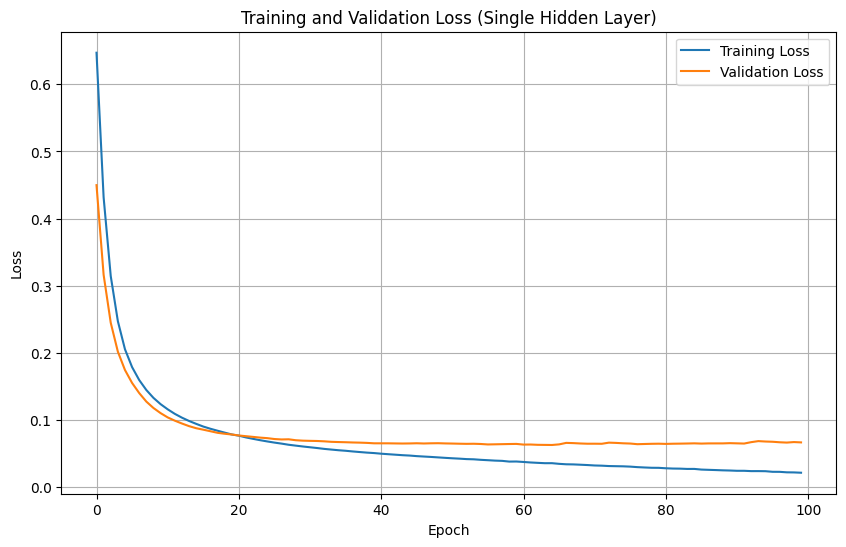

Results for Single Hidden Layer Neural Network:
Training Time (seconds): 14.7264
Final Training Loss: 0.0215
Final Validation Loss: 0.0667
Final Validation Accuracy: 0.9737


In [5]:
###################################################
############# problem 2 (a) #######################
###################################################
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

# Create a DataFrame
features = breast.feature_names
labels = np.reshape(breast_labels, (569, 1))
final_breast_data = np.concatenate([breast_data, labels], axis=1)
breast_dataset = pd.DataFrame(final_breast_data, columns=np.append(features, 'label'))

# Replace labels with meaningful names
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

# Separate features and labels
X = breast_dataset.iloc[:, :-1]
y = (breast_dataset['label'] == 'Malignant').astype(int)  # Binary classification: 1 for Malignant, 0 for Benign

# Standardize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the neural network with one hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 32 nodes
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and measure training time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)
training_time = time.time() - start_time

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

# Results
results_a = {
    "Training Time (seconds)": training_time,
    "Final Training Loss": history.history['loss'][-1],
    "Final Validation Loss": val_loss,
    "Final Validation Accuracy": val_accuracy
}

# Training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss (Single Hidden Layer)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Results for Single Hidden Layer Neural Network:")
for key, value in results_a.items():
    print(f"{key}: {value:.4f}")


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3662 - loss: 0.8411 - val_accuracy: 0.3947 - val_loss: 0.6557
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3990 - loss: 0.6400 - val_accuracy: 0.5439 - val_loss: 0.5788
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5839 - loss: 0.5647 - val_accuracy: 0.7368 - val_loss: 0.5327
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8110 - loss: 0.5266 - val_accuracy: 0.8333 - val_loss: 0.5031
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9116 - loss: 0.4758 - val_accuracy: 0.8947 - val_loss: 0.4813
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9303 - loss: 0.4560 - val_accuracy: 0.9211 - val_loss: 0.4629
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9381 - loss: 0.4504 - val_accuracy: 0.9474 - val_loss: 0.4433
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9654 - loss: 0.4129 - val_accuracy: 0.9

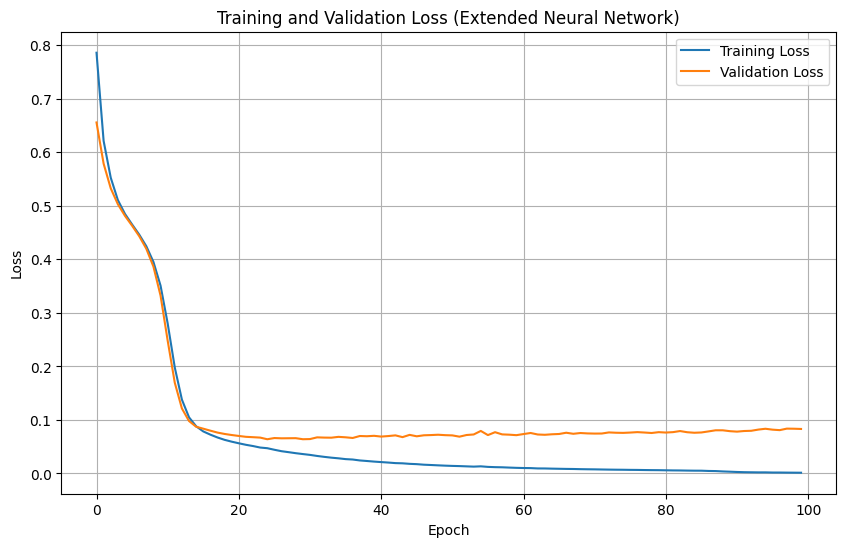

Results for Extended Neural Network:
Training Time (seconds): 18.6667
Final Training Loss: 0.0014
Final Validation Loss: 0.0832
Final Validation Accuracy: 0.9825


In [6]:
###################################################
############# problem 2 (b) #######################
###################################################
# Define the extended neural network with two additional hidden layers
model_extended = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    tf.keras.layers.Dense(16, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(8, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_extended.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the extended model and measure training time
start_time_extended = time.time()
history_extended = model_extended.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)
training_time_extended = time.time() - start_time_extended

# Evaluate the extended model
val_loss_extended, val_accuracy_extended = model_extended.evaluate(X_val, y_val, verbose=0)

# Results
results_b = {
    "Training Time (seconds)": training_time_extended,
    "Final Training Loss": history_extended.history['loss'][-1],
    "Final Validation Loss": val_loss_extended,
    "Final Validation Accuracy": val_accuracy_extended
}

# Training and validation loss plot for extended model
plt.figure(figsize=(10, 6))
plt.plot(history_extended.history['loss'], label='Training Loss')
plt.plot(history_extended.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss (Extended Neural Network)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Results for Extended Neural Network:")
for key, value in results_b.items():
    print(f"{key}: {value:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2772 - loss: 2.0846 - val_accuracy: 0.3777 - val_loss: 1.7554
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3894 - loss: 1.7396 - val_accuracy: 0.3602 - val_loss: 1.7803
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4064 - loss: 1.6776 - val_accuracy: 0.4112 - val_loss: 1.6298
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4276 - loss: 1.6104 - val_accuracy: 0.4189 - val_loss: 1.6392
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4411 - loss: 1.5710 - val_accuracy: 0.4440 - val_loss: 1.5670
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4500 - loss: 1.5481 - val_accuracy: 0.4358 - val_loss: 1.6054
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4570 - loss: 1.5371 - val_accuracy: 0.4530 - val_loss: 1.5573
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4607 - loss: 1.5218 - val_accu

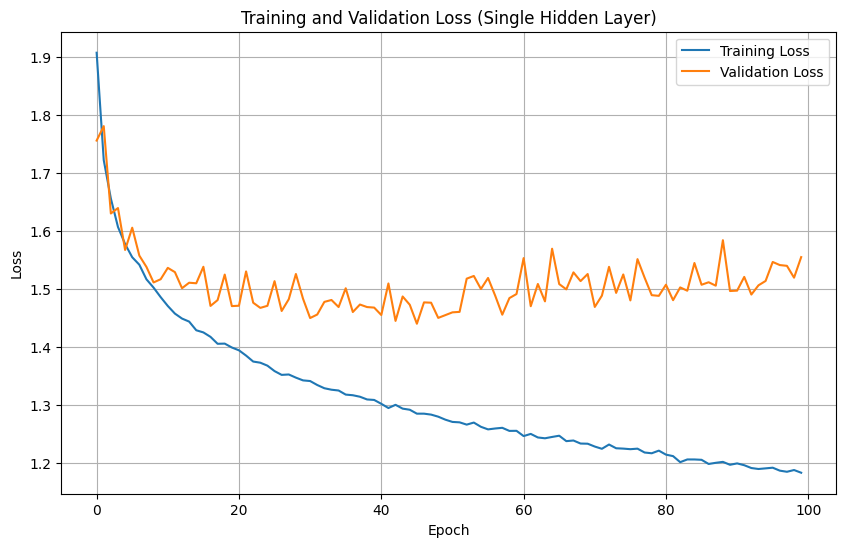

Results for Single Hidden Layer Neural Network:
Training Time (seconds): 235.7248
Final Training Loss: 1.1834
Final Validation Loss: 1.5547
Final Validation Accuracy: 0.4747


In [2]:
###################################################
############# problem 3 (a) #######################
###################################################
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Flatten the images for a fully connected network
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=10)
y_val_onehot = to_categorical(y_val, num_classes=10)

# Define the neural network with one hidden layer
model_one_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_flat.shape[1],)),  # Hidden layer with 256 nodes
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model_one_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and measure training time
start_time = time.time()
history_one_layer = model_one_layer.fit(
    X_train_flat, y_train_onehot,
    epochs=100, batch_size=64, validation_data=(X_val_flat, y_val_onehot), verbose=1
)
training_time = time.time() - start_time

# Evaluate the model on the validation set
val_loss, val_accuracy = model_one_layer.evaluate(X_val_flat, y_val_onehot, verbose=0)

# Results
results_a = {
    "Training Time (seconds)": training_time,
    "Final Training Loss": history_one_layer.history['loss'][-1],
    "Final Validation Loss": val_loss,
    "Final Validation Accuracy": val_accuracy
}

# Training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_one_layer.history['loss'], label='Training Loss')
plt.plot(history_one_layer.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss (Single Hidden Layer)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Results for Single Hidden Layer Neural Network:")
for key, value in results_a.items():
    print(f"{key}: {value:.4f}")


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2552 - loss: 2.0370 - val_accuracy: 0.3596 - val_loss: 1.7718
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3789 - loss: 1.7369 - val_accuracy: 0.4136 - val_loss: 1.6323
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4141 - loss: 1.6409 - val_accuracy: 0.4272 - val_loss: 1.6091
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4391 - loss: 1.5766 - val_accuracy: 0.4406 - val_loss: 1.5866
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4503 - loss: 1.5341 - val_accuracy: 0.4455 - val_loss: 1.5482
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4661 - loss: 1.4882 - val_accuracy: 0.4665 - val_loss: 1.5100
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4793 - loss: 1.4653 - val_accuracy: 0.4683 - val_loss: 1.5071
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4853 - loss: 1.4416 - val_accu

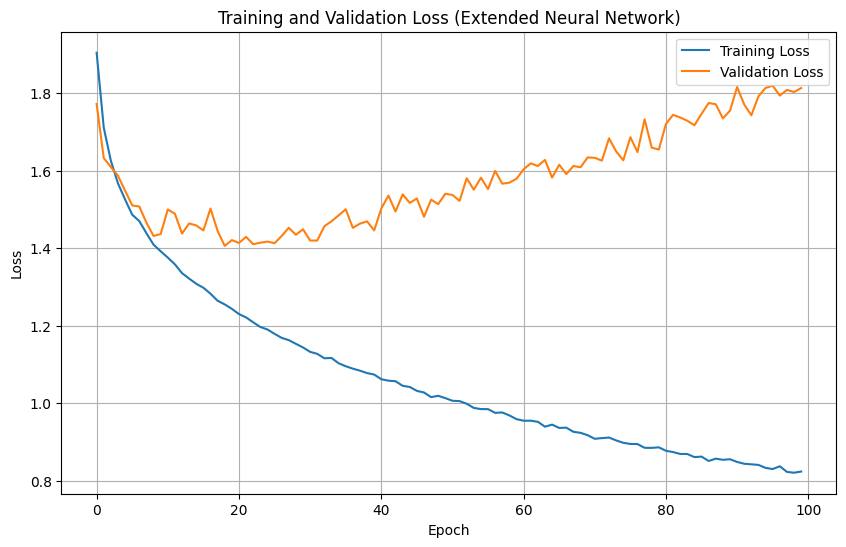

Results for Extended Neural Network:
Training Time (seconds): 264.1973
Final Training Loss: 0.8232
Final Validation Loss: 1.8129
Final Validation Accuracy: 0.4950


In [3]:
###################################################
############# problem 3 (b) #######################
###################################################

# Define the extended neural network with two additional hidden layers
model_extended = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_flat.shape[1],)),  # First hidden layer
    tf.keras.layers.Dense(128, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(64, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model_extended.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the extended model and measure training time
start_time_extended = time.time()
history_extended = model_extended.fit(
    X_train_flat, y_train_onehot,
    epochs=100, batch_size=64, validation_data=(X_val_flat, y_val_onehot), verbose=1
)
training_time_extended = time.time() - start_time_extended

# Evaluate the extended model on the validation set
val_loss_extended, val_accuracy_extended = model_extended.evaluate(X_val_flat, y_val_onehot, verbose=0)

# Results
results_b = {
    "Training Time (seconds)": training_time_extended,
    "Final Training Loss": history_extended.history['loss'][-1],
    "Final Validation Loss": val_loss_extended,
    "Final Validation Accuracy": val_accuracy_extended
}

# Training and validation loss plot for extended model
plt.figure(figsize=(10, 6))
plt.plot(history_extended.history['loss'], label='Training Loss')
plt.plot(history_extended.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss (Extended Neural Network)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Results for Extended Neural Network:")
for key, value in results_b.items():
    print(f"{key}: {value:.4f}")
